#### Data Loading

In [ ]:
#data link 
#https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data

In [ ]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib as plt 
import seaborn as sns


In [ ]:
# run it only one time >> the data will be downloaded >> just change the path to the path were you add kaggle.json into 

import os
import zipfile
import pandas as pd

os.environ['KAGGLE_CONFIG_DIR'] = r"D:\Shrouk\EpsilonAI\Projects\Mid project"
print("Downloading dataset from Kaggle...")
os.system("kaggle datasets download -d austinreese/craigslist-carstrucks-data")
print("🗂️ Unzipping dataset...")

with zipfile.ZipFile("craigslist-carstrucks-data.zip", 'r') as zip_ref:
    zip_ref.extractall("cars_data")

csv_path = "cars_data/vehicles.csv"
data = pd.read_csv(csv_path)

print("✅ Dataset loaded successfully!")
print(data.head())


In [ ]:
df = pd.read_csv("vehicles.csv")


In [ ]:
df.head()


#### Data understanding

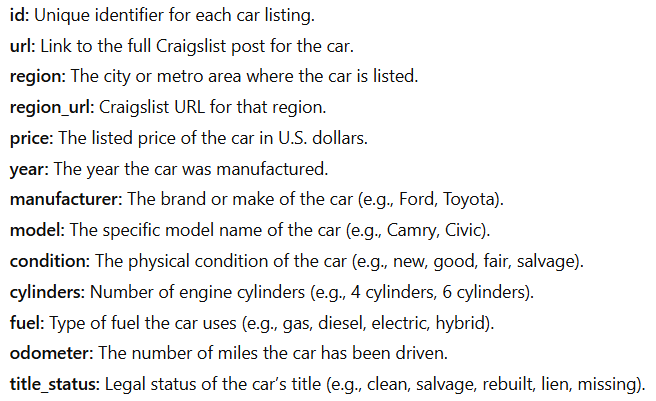
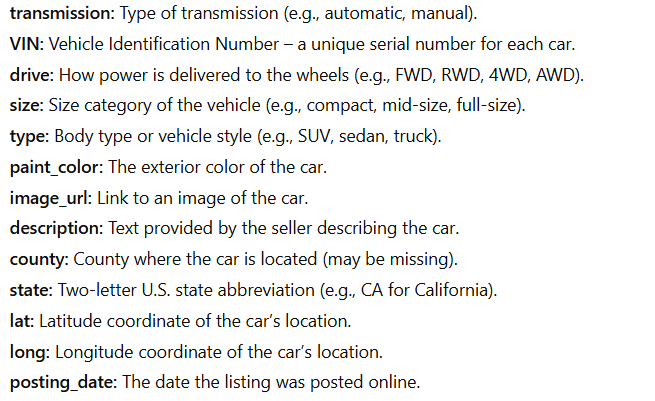

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.shape


In [ ]:
df.columns

In [ ]:
df.type

#### Data Exploration

In [ ]:
df.info()

In [ ]:
df.region_url

In [ ]:
df.describe(include='number').round(4)

In [ ]:
df.describe(include='object').round(4)

In [ ]:
df.region

In [ ]:
df.dtypes

In [ ]:
df.posting_date.unique()

In [ ]:
df.columns

In [ ]:
df.county


In [ ]:
# checking duplicates in data
df.duplicated().sum()

In [ ]:
# checking missing values percantage in data
df.isna().mean()  * 100

In [ ]:
# Impute(VIN, drive, size, paint_color, type, cylinders, condition, )
# convert date (extract if any)

##### Handling missing values (drop only)

In [ ]:
# drop column county (all is missing) , id (no need)
df.drop('county', axis = 1, inplace= True)
df.drop('id', axis = 1, inplace= True)

# drop columns 'url', 'region_url', 'image_url' (no need)
df.drop(['url', 'region_url', 'image_url'], axis=1, inplace = True)

# drop missing from (manufacturer, lat, long, title_status, 
# odometer, fuel, model, posting_date) >>  small amoint of missing (0.1%  to  5%)
df.dropna(subset= ['manufacturer', 'lat', 'long', 'title_status', 'odometer', 'fuel', 'model', 'posting_date'], axis = 0, inplace = True)

In [ ]:
df.head(2)

In [ ]:
df.reset_index(inplace= True, drop= True)

In [ ]:
df.head()

##### Feature Engineering

In [ ]:
# converting posting date to datetime to extract data from
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True, errors='coerce')
df['posting_date']

In [ ]:
# Extract important data from posting date >> year
df['post_year'] = df['posting_date'].dt.year
df['post_year']

In [ ]:
# Extract important data from posting date >> month
df['month'] = df['posting_date'].dt.month_name()
df['month']

In [ ]:
# Extract important data from posting date >> day
df['day'] = df.posting_date.dt.day_name()
df['day']

In [ ]:
df['year']

In [ ]:
df.head(2)

In [ ]:
# drop useless columns after feature engineering
df.drop('posting_date', axis= 1, inplace = True)

df.drop('description', axis = 1, inplace = True)

In [ ]:
# check duplicates after filling nan values
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()

In [ ]:
# final data columns 
df.head(3)

##### In depth checking categorical columns

In [ ]:
cat_cols = df.select_dtypes('object').columns
cat_cols

In [ ]:
for col in cat_cols:
    print(col)
    print("Number of uniques:", df[col].nunique())
    print("uniques:", df[col].unique())
    print("#" * 50)

In [ ]:
df.columns

##### handling cylinders feature 

In [ ]:
# 1- cylinders "other"  >> fuel "electric"
# as per knowledge domain the electric cars have 0 cylinders

df['cylinders'] = df.apply(lambda x: '0' if x['fuel'] == 'electric' else x['cylinders'], axis = 1)

In [ ]:
df[df.fuel == 'electric']

In [ ]:
# 2 - replacing 'other' value with -1 
df['cylinders'] = df.apply(lambda x: '-1' if x['cylinders'] == 'other' else x['cylinders'], axis = 1)

In [ ]:
# 3 - remove 'cylinder' word from each value
df['cylinders'] = df['cylinders'].str.replace(" cylinders", "")

In [ ]:
# last check for cylinders values
df.cylinders.unique()

In [ ]:
# convert type from str to int >>> delayed after imputation
#df.cylinders = df.cylinders.astype(int)

##### Handling outliers

##### price feature outliers

In [ ]:
df.price.nunique()

In [ ]:
df.price.value_counts()

In [ ]:
df.post_year.max()


In [ ]:
df.price.max()   ## detected an outlier

In [ ]:
num_col = df.select_dtypes('number').columns
num_col

In [ ]:
# in depth checking outliers 
for col in num_col:
    px.box(data_frame= df, x = col).show()

In [ ]:
# 1st trial with the built-in function 

from datasist.structdata import detect_outliers

outlier_indices = detect_outliers(data= df, n= 0, features= ['price'])
outlier_indices

In [ ]:
px.box(data_frame= df.loc[outlier_indices], x = 'price')

In [ ]:
# custom function to detect the outliers
def detect_outlier(df, col, lower, upper):

    upper_bound = df[col].quantile(upper)
    lower_bound = df[col].quantile(lower)

    return df[(df[col] <= lower_bound) | (df[col] >= upper_bound)].index

In [ ]:
# checking the outliers (price) 
outliers_price = detect_outlier(df, col= 'price', lower = 0.05, upper = 0.97)
outliers_price

In [ ]:
df.loc[[19, 77]]

In [ ]:
# Ensure that the outliers have been handled
px.box(data_frame= df.loc[outliers_price], x = 'price')

In [ ]:
df.loc[outliers_price]

In [ ]:
df.drop(outliers_price, inplace= True)
df.reset_index(inplace= True, drop= True)

In [ ]:
px.histogram(data_frame= df, x = 'price')

##### Year outliers

In [ ]:
# checking the outliers (year) [dropped all rows that has a year value that is <= 1970 as per domain knowledge]
df.drop((df[df.year < 1970].index), axis= 0, inplace= True)

In [ ]:
df.reset_index(drop = True)

In [ ]:
df[df.year < 1970]

In [ ]:
px.box(data_frame= df, x = 'year')

##### Odometer outliers

In [ ]:
px.box(data_frame= df, x = 'odometer')

In [ ]:
df[df.odometer > 600000]

In [ ]:
# checking the outliers (odometer) [dropped all rows that has an odometer that is > 600.000 miles as per domain knowledge]
df.drop((df[df.odometer > 600000].index), axis= 0, inplace= True)

In [ ]:
df.reset_index(drop= True)

In [ ]:
df.head(3)

In [ ]:
df.shape

##### In depth checking numerical columns (before imputation)

In [ ]:
for col in num_col:
    px.histogram(data_frame= df, x = col).show()

In [ ]:
df.duplicated().sum()

##### Data preprocessing

###### 1- Split Data into Input Features and Target Variable
###### 2- Split Data into Train & Test
###### 3- Numerical : Impute Missing >> Scaling
###### 4- Categorical : Impute Missing >> Encoding

In [ ]:
# split data into targeted feature and input features

x = df.drop('price', axis = 1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 0)

In [ ]:
x_train.duplicated().sum()

In [ ]:
x_test.duplicated().sum()

In [ ]:
y_train.duplicated().sum()

In [ ]:
y_test.duplicated().sum()

In [ ]:
x_train.head(2)

##### Handling missing values (Imputation)

In [ ]:
# Numerical 
num_cols = x_train.select_dtypes(include= 'number').columns
num_cols

In [ ]:
from sklearn.impute import KNNImputer

knn = KNNImputer()

x_train[num_cols] = knn.fit_transform(x_train[num_cols])

x_test[num_cols] = knn.transform(x_test[num_cols])

In [ ]:
for col in num_cols:
    px.histogram(data_frame= df, x = col).show()

In [ ]:
x_train.isna().sum()

In [ ]:
x_test.isna().sum()

##### Imputation for categorical 

In [ ]:
cat_cols = x_train.select_dtypes(include= 'object').columns
cat_cols

In [ ]:
from sklearn.impute import SimpleImputer

simple_imp = SimpleImputer(strategy= 'most_frequent')


# Impute training data
x_train_cat_imputed = pd.DataFrame(
    simple_imp.fit_transform(x_train[cat_cols]),
    columns=cat_cols,
    index=x_train.index
)

x_train[cat_cols] = x_train_cat_imputed

# Impute test data
x_test_cat_imputed = pd.DataFrame(
    simple_imp.transform(x_test[cat_cols]),
    columns=cat_cols,
    index=x_test.index
)

x_test[cat_cols] = x_test_cat_imputed


In [ ]:
x_train.isna().sum()

In [ ]:
x_test.isna().sum()

In [ ]:
print(x_train.shape)
print(y_train.shape)

In [ ]:
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)
print("Duplicates in x_train:", x_train.duplicated().sum())
print("Duplicates in x_train:", y_train.duplicated().sum())


##### Concat all again in one df as a copy(just for analysis )

In [ ]:
train_df = pd.concat([x_train, y_train], axis=1)
test_df = pd.concat([x_test, y_test], axis=1)
X_all = pd.concat([x_train, x_test], axis=0).reset_index(drop=True)
y_all = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)
full_df = pd.concat([X_all, y_all], axis=1)
full_df.shape

#full_df.head()
full_df.to_csv('cleaned data for analysis.csv')

##### Feature Scaling

In [ ]:
x_train.cylinders = x_train.cylinders.astype(int)

x_test.cylinders = x_test.cylinders.astype(int)

In [ ]:
num_cols = x_train.select_dtypes(['int', 'float']).columns
num_cols

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaling_cols = ['odometer', 'lat', 'long', 'cylinders']

x_train[scaling_cols] = scaler.fit_transform(x_train[scaling_cols])
x_test[scaling_cols] = scaler.transform(x_test[scaling_cols])

In [ ]:
x_train

In [ ]:
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)

##### Encoding

In [ ]:
x_train.select_dtypes(include= 'object')

##### Ordinal

In [ ]:
x_train.columns

In [ ]:
ordinal_cols = ['size', 'drive', 'condition']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

x_train[ordinal_cols] = ord_enc.fit_transform(x_train[ordinal_cols])
x_test[ordinal_cols] = ord_enc.transform(x_test[ordinal_cols])

##### Nominal

In [ ]:
for col in x_train.select_dtypes(include= 'object').columns:
    
    print(col)
    print(x_train[col].nunique())

In [ ]:
ohe_cols = [ 'fuel', 'title_status', 'month', 'day', 'transmission']
ohe_cols

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output= False, drop= 'first')

ohe_train = ohe.fit_transform(x_train[ohe_cols])

ohe_test = ohe.transform(x_test[ohe_cols])

In [ ]:
ohe.get_feature_names_out()

In [ ]:
ohe_train_df = pd.DataFrame(ohe_train, columns= ohe.get_feature_names_out())

ohe_test_df = pd.DataFrame(ohe_test, columns= ohe.get_feature_names_out())

In [ ]:
ohe_train_df

In [ ]:
x_train

In [ ]:
x_train.reset_index(inplace= True, drop= True)

x_test.reset_index(inplace= True, drop= True)

y_train.reset_index(inplace= True, drop= True)

y_test.reset_index(inplace= True, drop= True)

In [ ]:
x_train = pd.concat([x_train, ohe_train_df], axis= 1).drop(ohe_cols, axis= 1)

x_test = pd.concat([x_test, ohe_test_df], axis= 1).drop(ohe_cols, axis= 1)

In [ ]:
## Binary Encoding 

binary_cols = x_train.select_dtypes(include= 'object').columns
binary_cols

In [ ]:
from category_encoders import BinaryEncoder

be = BinaryEncoder()

be_train_df = be.fit_transform(x_train[binary_cols])

be_test_df = be.transform(x_test[binary_cols])

In [ ]:
x_train = pd.concat([x_train, be_train_df], axis= 1).drop(binary_cols, axis = 1)

x_test = pd.concat([x_test, be_test_df], axis= 1).drop(binary_cols, axis = 1)

In [ ]:
x_train

In [ ]:
y_train